In [2]:
import numpy as np
from bias import Bias
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
from cosmology import Cosmology

plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

In [4]:
N0_path = "cache/_N0"
%time bias = Bias(N0_path, M_path="cache/_M", exp="SO")

CPU times: user 9min 33s, sys: 10.7 s, total: 9min 43s
Wall time: 1min 14s


In [12]:
%time omega_Ls, omega_ps = Cosmology().get_postborn_omega_ps(ellmax=8000)
omega_ps_spline = InterpolatedUnivariateSpline(omega_Ls, omega_ps)

CPU times: user 58.9 s, sys: 7.29 s, total: 1min 6s
Wall time: 12.6 s


In [6]:
def get_log_sample_Ls(Lmin, Lmax, Nells=10):
    floaty = Lmax / 1000
    samp1 = np.arange(Lmin, floaty * 10, 10)
    samp2 = np.logspace(1, 3, Nells-np.size(samp1)) * floaty
    return np.concatenate((samp1, samp2))

In [24]:
Lmin = 30
Lmax = 4000
Ls = get_log_sample_Ls(Lmin, Lmax, 5)
print(f"Ls = {Ls}")
%time N_A1_curl_TT, N_C1_curl_TT = bias.bias("theory", "TT", Ls, gmv=False, N_L1=100, N_L3=100, Ntheta12=100, Ntheta13=100, T_Lmin=30, T_Lmax=3000)
N = N_A1_curl_TT + N_C1_curl_TT

Ls = [  30.           40.          185.66355334  861.77387601 4000.        ]
CPU times: user 3min 40s, sys: 11.8 s, total: 3min 51s
Wall time: 3min 32s


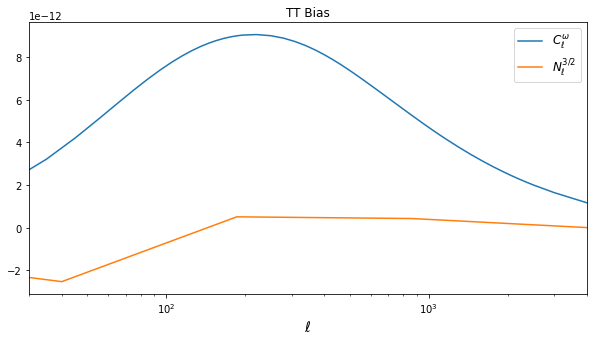

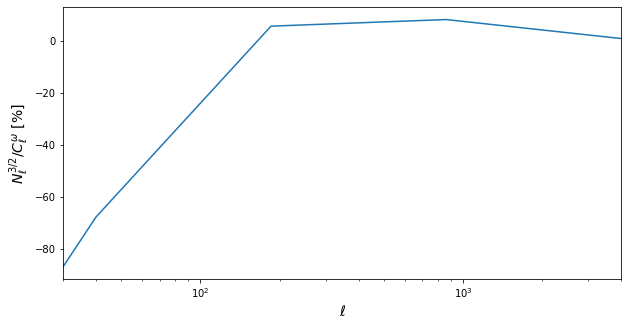

In [25]:
plt.semilogx(omega_Ls, omega_ps, label="$C_{\ell}^{\omega}$")
plt.semilogx(Ls, N, label="$N^{3/2}_{\ell}$")
plt.title("TT Bias")
plt.xlabel("$\ell$", fontsize=14)
plt.legend(prop={'size': 12})
plt.xlim(Lmin, Lmax)

plt.figure()
plt.semilogx(Ls, 100*(N)/omega_ps_spline(Ls))
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.ylabel("$N^{3/2}_{\ell}/C_{\ell}^{\omega}$ [%]", fontsize=14)
plt.show()

In [26]:
Ls = get_log_sample_Ls(Lmin, Lmax, 5)
print(f"Ls = {Ls}")
%time N_A1_curl_TT, N_C1_curl_TT = bias.bias("theory", "TT", Ls, gmv=False, N_L1=100, N_L3=100, Ntheta12=100, Ntheta13=100, T_Lmin=30, T_Lmax=4000)
N = N_A1_curl_TT + N_C1_curl_TT

Ls = [  30.           40.          185.66355334  861.77387601 4000.        ]
CPU times: user 4min 22s, sys: 2.23 s, total: 4min 24s
Wall time: 4min 4s


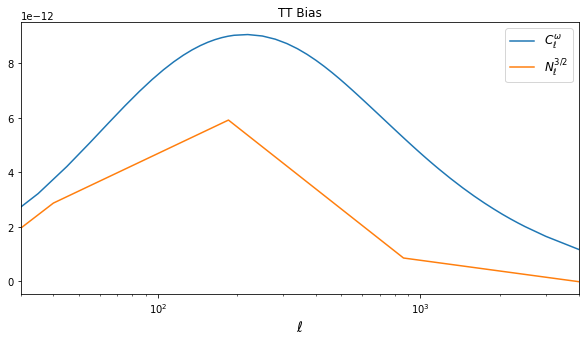

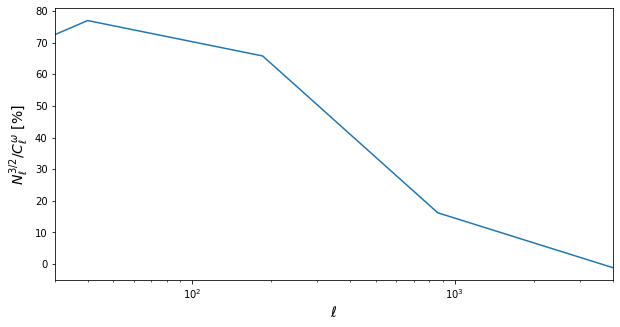

In [28]:
plt.semilogx(omega_Ls, omega_ps, label="$C_{\ell}^{\omega}$")
plt.semilogx(Ls, N, label="$N^{3/2}_{\ell}$")
plt.title("TT Bias")
plt.xlabel("$\ell$", fontsize=14)
plt.legend(prop={'size': 12})
plt.xlim(Lmin, Lmax)

plt.figure()
plt.semilogx(Ls, 100*(N)/omega_ps_spline(Ls))
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.ylabel("$N^{3/2}_{\ell}/C_{\ell}^{\omega}$ [%]", fontsize=14)
plt.show()